# Notebook to calculate performance of specific strategies

In [1]:
import os
import sys
currentdir = os.getcwd() 
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
from df_utils import *
from run_strategies import *
from helper_solution_analysis import *
import pandas as pd
import numpy as np
import ast
import json
import os
from df_utils import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import gym
import gym_furniture

In [2]:
# get data csv
par_parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
data_file = 'data/online/full_experiment/data_furnituremanufacturing_2021-08-11_09-15.csv'
data_path = os.path.join(par_parent_dir, data_file)

# transform to dataframe
df, df_model, df_ge, df_vp_sol, df_qual,  df_actions, df_built, df_resources, df_play_times = decompose_csv(data_path)
df_complete_sol =  get_complete_sol(df_resources)

read cache


In [3]:
env= gym.make('SmallFurniture-v0')

global_greedy_rewards, global_greedy_actions, global_greedy_states = strategy_run(env)
grouped_greedy_rewards,grouped_greedy_actions, grouped_greedy_states  = strategy_run(env, strategy = 'grouped greedy', first_group = 1)
material_balancing_rewards, material_balancing_actions, material_balancing_states = strategy_run(env, strategy = 'material balancing')
greedy_material_balancing_rewards, greedy_material_balancing_actions, greedy_material_balancing_states = strategy_run(env, strategy = 'greedy material balancing')
greedy_then_material_balancing_rewards, greedy_then_material_balancing_actions, greedy_then_material_balancing_states = strategy_run(env,strategy = 'greedy, then material balancing')
minimize_min_rewards, minimize_min_actions, minimize_min_states = strategy_run(env,strategy = 'minimize_min')
gr_minimize_min_rewards, gr_minimize_min_actions, gr_minimize_min_states = strategy_run(env,strategy = 'greedy_minimize_min')
cost_benefit_rewards, cost_benefit_actions, cost_benefit_states = strategy_run(env,strategy = 'cost_benefit')

strategy_dict = {'global greedy':global_greedy_actions,
                 'grouped greedy': grouped_greedy_actions,
                 'material balancing':material_balancing_actions,
                 'greedy material balancing':greedy_material_balancing_actions,
                 'greedy, then material balancing': greedy_then_material_balancing_actions,
                 'minimize_min':minimize_min_actions,
                 'greedy_minimize_min': gr_minimize_min_actions,
                'cost_benefit': cost_benefit_actions}

/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


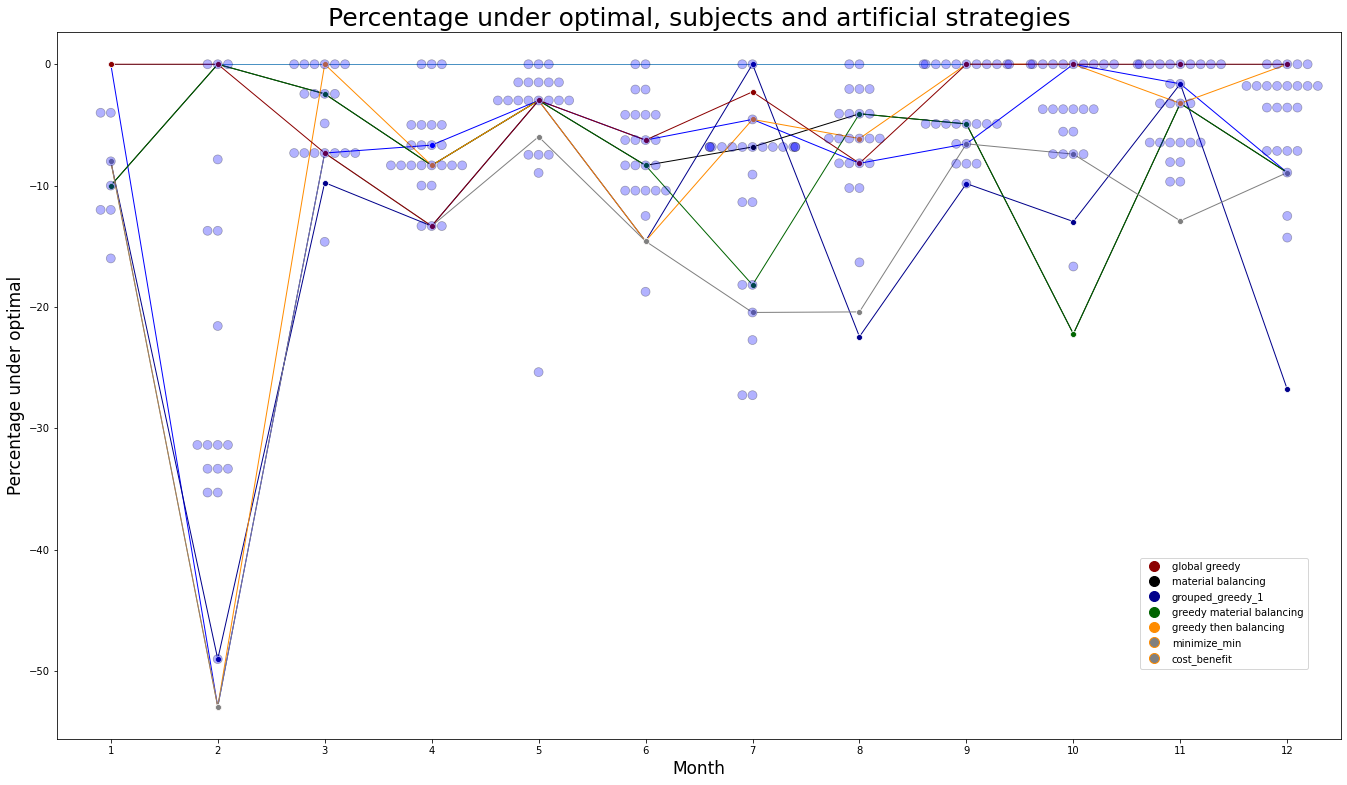

In [5]:
fig = plt.figure(figsize=(23, 13) )
plt.title('Percentage under optimal, subjects and artificial strategies', fontsize = 25)

puo = ((df_vp_sol.filter(regex='PL01').values/df_model.filter(regex = 'MD01').iloc[0].values)-1)*100 # percentage under optimal
df_diff = pd.DataFrame(puo, columns = list(range(1,13)))
df_diff['vp'] = df_vp_sol.filter(regex='PL01').index
df_diff = df_diff.set_index('vp')
df_diff.columns.name = 'month'

df_plot = df_diff.melt(value_name = 'difference', ignore_index=False)#
df_complete_mask = df_complete_sol.melt(value_name = 'complete', ignore_index=False)
df_diff_with_mask = pd.concat([df_plot, df_complete_mask['complete']], axis = 1)


sns.lineplot(x=list(range(12)),y=np.zeros(12), linewidth = 0.8)

#sns.swarmplot(data = df_diff_with_mask ,x='month', y = 'difference',hue = 'complete', alpha = 0.6,  size = 9,linewidth = 0.7, edgecolor="black")
sns.swarmplot(data = df_diff_with_mask[df_diff_with_mask.complete == True] ,x='month', y = 'difference', alpha = 0.3,  size = 9,linewidth = 0.7, edgecolor="black", color = 'blue')

#sns.swarmplot(data = df_plot,x='month', y = 'difference', alpha = 0.6,  size = 9,linewidth = 0.7, edgecolor="black")
line1 = sns.lineplot(x=list(range(12)),y=get_diff(global_greedy_rewards),   
                     linewidth = 1,  marker = "o", color = 'blue')
line2 = sns.lineplot(x=list(range(12)),y=get_diff(material_balancing_rewards),   
                     linewidth = 1,  marker = "o", color = 'black')
line3 = sns.lineplot(x=list(range(12)),y=get_diff(grouped_greedy_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkblue')
line4 = sns.lineplot(x=list(range(12)),y=get_diff(greedy_material_balancing_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkgreen')
line5 = sns.lineplot(x=list(range(12)),y=get_diff(greedy_then_material_balancing_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkorange')
line6 = sns.lineplot(x=list(range(12)),y=get_diff(minimize_min_rewards),   
                     linewidth = 1,  marker = "o", color = 'grey')
line7 = sns.lineplot(x=list(range(12)),y=get_diff(cost_benefit_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkred')
xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Percentage under optimal', fontsize = 17)
custom_handles = [Line2D([], [], marker='o', color='darkred',linestyle='None',markerfacecolor='darkred', markersize=10), 
                  Line2D([], [], marker='o', color='black',linestyle='None', markerfacecolor='black', markersize=10), 
                  Line2D([], [], marker='o', color='darkblue',linestyle='None',markerfacecolor='darkblue', markersize=10), 
                  Line2D([], [], marker='o', color='darkgreen',linestyle='None',markerfacecolor='darkgreen', markersize=10),
                  Line2D([], [], marker='o', color='darkorange',linestyle='None',markerfacecolor='darkorange', markersize=10),
                  Line2D([], [], marker='o', color='darkorange',linestyle='None',markerfacecolor='grey', markersize=10),
                  Line2D([], [], marker='o', color='darkorange',linestyle='None',markerfacecolor='grey', markersize=10)]


custom_labels = ['global greedy', 'material balancing', 'grouped_greedy_1', 'greedy material balancing', 'greedy then balancing', 'minimize_min', 'cost_benefit']
l = fig.legend(custom_handles, custom_labels, bbox_to_anchor=(0.88, 0.2), loc='lower right', borderaxespad=0.)
fig.savefig('Images/strategy_analysis/difference_to_optimal_strategies.jpg',bbox_inches='tight')


# Trajectory similiarities

How do we define similiarity?

* count how many furniture items where built at the same timestep (kind of stupid)
* count similar built states (cumulative furniture)

In [8]:
fig = plt.figure(figsize=(10, 19) )
fig.suptitle('Number of vps in specific resource states in month 12 \n (not showing states with only one)', fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(bottom=0.25, left=0.025, top = 0.93, right=0.975)   

m = 12
df_full = df_resources[df_resources.full_furniture != 'nothing'].copy()
df_full[['wood', 'metal', 'wsA','wsB', 'wsC', 'wsD']] = df_full[['wood', 'metal', 'wsA','wsB', 'wsC', 'wsD']].astype(int)
df_full['resources'] = df_full[['wood', 'metal', 'wsA','wsB', 'wsC', 'wsD']].apply(tuple, axis=1)
resource_counts = df_full.groupby(['month','resources']).count().vp
resource_counts = resource_counts.reset_index()
resource_counts = resource_counts.sort_values('resources', ascending = False)
sns.barplot(y = resource_counts[(resource_counts.month == m) & (resource_counts.vp> 1)& (resource_counts.vp< 31)].resources ,x = resource_counts.vp, color = 'b')
plt.xlabel('number of vps', fontsize=18)
plt.ylabel('resources', fontsize=16)
plt.close()
#fig.savefig('Images/strategy_analysis/difference_to_optimal_strategies.jpg',bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(10, 20) )
fig.suptitle('Number of vps in specific (part.) solutions in month 12 \n (not showing states with only one)', fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(bottom=0.25, left=0.025, top = 0.93, right=0.975)   
m = 12
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

df_solution_paths = get_solution_df(solution_dict(m, df_built))
solution_counts = df_solution_paths.groupby('solutions').count().vp
solution_counts = solution_counts.reset_index()

sns.barplot(y = solution_counts[ (solution_counts.vp> 1)& (solution_counts.vp< 31)].solutions, x = solution_counts.vp, color = 'g') 
#plt.tick_params(axis = 'x',labelrotation=90)
plt.xlabel('number of vps', fontsize=18)
plt.close()

### Similiarity strategy tp vp

In [ ]:
for h in range(2):
    sns.set(font_scale=1.6, style = 'white', palette = 'deep') 
    fig = plt.figure(figsize=(23, 26) )
    fig.subplots_adjust(bottom=0.25, left=0.025, top = 0.93, right=0.975)   
    fig.suptitle('Similiarity between vp and defined strategies in each month', fontsize = 30)
    fig.tight_layout()
    for m in range(1+h*6,7+h*6):
        sub = fig.add_subplot(6,1,m-h*6)
        sub.set_title('Month ' + str(m), fontweight='bold')
        df_vps = get_solution_df(solution_dict(m,df_built))
        sim_mat = pd.DataFrame(index = list(strategy_dict.keys()), columns =df_vps.vp.unique())
        for idx in sim_mat.index:
            for col in sim_mat.columns:
                state = env.reset(m-1)

              #  s1 = df_trajs[(df_trajs.strategy == idx) &(df_trajs.month == m)].solutions[1:]
              #  s2 = df_vps[(df_vps.vp== col) &(df_vps.month == m)].solutions[1:]
                vp_traj = get_vp_solutions(df_built, col, m)
                if idx == 'grouped greedy':

                    sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity_state(env, vp_traj, m, idx,1)
                else:
                    sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity_state(env, vp_traj, m, idx)
        colormap =  sns.cubehelix_palette(n_colors=9, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse = False)
        if m !=12:
            sns.heatmap(data = sim_mat.astype(float),
                                    cbar = False,  cmap = colormap,
                                    annot = True, linewidths=1, xticklabels=False)
        else:
               sns.heatmap(data = sim_mat.astype(float),
                                    cmap = colormap, cbar = False, 
                                    annot = True, linewidths=1, cbar_kws={'label': 'Trajectory similiarity', 'orientation': 'horizontal', 'shrink': 0.6})
    fig.savefig('Images/strategy_analysis/similiarity_between_vps_and_strategies_month_'+ str(1+h*6)+ '_'+str(6+h*6)+'.jpg',bbox_inches='tight')

### Similiarity vp to vp

In [ ]:
for m in range(1,13):
    fig = plt.figure(figsize=(23, 18) )
    df_vps = get_solution_df(solution_dict(m,df_built))
    sim_mat = pd.DataFrame(index = df_vps.vp.unique(), columns =df_vps.vp.unique())
    for idx in sim_mat.index:
        for col in sim_mat.columns:
            s1 = df_vps[(df_vps.vp== idx) ].solutions[1:]
            s2 = df_vps[(df_vps.vp== col) ].solutions[1:]

            sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity(s1, s2)
    colormap =  sns.cubehelix_palette(n_colors=9, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse = False)
    mask = np.triu(np.ones_like(sim_mat, dtype=np.bool))

    sns.heatmap(data = sim_mat.astype(float).round(2),mask = mask,
                                cmap = colormap,  
                                annot = True, linewidths=1, cbar = False)

    fig.savefig('Images/strategy_analysis/similiarity_between_vps_month_'+ str(m)+'.jpg',bbox_inches='tight')

In [ ]:
sns.set(font_scale=1.6, style = 'white', palette = 'deep') 
fig = plt.figure(figsize=(23, 8) )
fig.subplots_adjust(bottom=0.25, left=0.025, top = 0.93, right=0.975)   
#fig.suptitle('Similiarity between vp and defined strategies in each month', fontsize = 30)
fig.tight_layout()
sub = fig.add_subplot(2,1, 1)
m = 8

sub.set_title('Trial ' + str(m), fontweight='bold')
df_vps = get_solution_df(solution_dict(m,df_built))
sim_mat = pd.DataFrame(index = ['global greedy', 'material balancing'], columns =df_vps.vp.unique())
print(sim_mat)
for idx in sim_mat.index:
    for col in sim_mat.columns:
        state = env.reset(m-1)

      #  s1 = df_trajs[(df_trajs.strategy == idx) &(df_trajs.month == m)].solutions[1:]
      #  s2 = df_vps[(df_vps.vp== col) &(df_vps.month == m)].solutions[1:]
        vp_traj = get_vp_solutions(df_built, col, m)

        sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity_state(env, vp_traj, m, idx)
colormap =  sns.cubehelix_palette(n_colors=9, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse = False)
sns.heatmap(data = sim_mat.astype(float),
                            cbar = False,  cmap = colormap,
                            annot = True, linewidths=1, xticklabels=False)
sub = fig.add_subplot(2,1, 2)
m = 10

sub.set_title('Trial ' + str(m), fontweight='bold')
df_vps = get_solution_df(solution_dict(m,df_built))
sim_mat = pd.DataFrame(index = ['global greedy', 'material balancing'], columns =df_vps.vp.unique())
for idx in sim_mat.index:
    for col in sim_mat.columns:
        state = env.reset(m-1)

      #  s1 = df_trajs[(df_trajs.strategy == idx) &(df_trajs.month == m)].solutions[1:]
      #  s2 = df_vps[(df_vps.vp== col) &(df_vps.month == m)].solutions[1:]
        vp_traj = get_vp_solutions( df_built,col, m)

        sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity_state(env, vp_traj, m, idx)
colormap =  sns.cubehelix_palette(n_colors=9, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse = False)
sns.heatmap(data = sim_mat.astype(float),
                            cbar = True,  cmap = colormap,
                            annot = True, linewidths=1, cbar_kws={'label': 'Trajectory similiarity', 'orientation': 'horizontal', 'shrink': 0.6})
fig.savefig('Images/strategy_analysis/paper_similiarity.jpg',bbox_inches='tight')

In [ ]:
sum(sim_mat[sim_mat >0.8].count())

furniture_list(df_built,df_built.vp.unique(), 1)